<a href="https://colab.research.google.com/github/SiLiKhon/HEPStatsSeminar/blob/Alexey/seminar2/Linear_models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
!pip install uproot
import uproot
%matplotlib inline

# Samples

We will consider the following physics processes:
* Signal: $pp \rightarrow H \rightarrow ZZ^{*} \rightarrow \ell\ell\ell\ell$
* Background: $pp \rightarrow ZZ^{*} \rightarrow \ell\ell\ell\ell$

These samples are produced using [FCCSW](https://github.com/HEP-FCC/FCCSW) , which is proposed Common software for all [FCC experiments](http://cern.ch/fcc). The samples are:
* generated with [Pythia8](http://home.thep.lu.se/Pythia/) (interfaced to FCCSW)
* went through parametric detector simulation with [Delphes](https://cp3.irmp.ucl.ac.be/projects/delphes) (interfaced to FCCSW)
* passed event selection with [Heppy analysis framework](https://github.com/cbernet/heppy)

The samples are flat n-tuples.

See [FCC tutorials](https://github.com/HEP-FCC/fcc-tutorials/blob/master/FccFullAnalysis.md) for details.


In [0]:
pp_h_4l_file = uproot.open("https://raw.githubusercontent.com/SiLiKhon/HEPStatsSeminar/master/data/pp_h_4l_tree.root")["events"]
pp_zgzg_4l_file = uproot.open("https://raw.githubusercontent.com/SiLiKhon/HEPStatsSeminar/master/data/pp_zgzg_4l_tree.root")["events"]

In [3]:
pp_h_4l_file.keys()

[b'weight',
 b'lep1vsPt_pdgid',
 b'lep1vsPt_e',
 b'lep1vsPt_pt',
 b'lep1vsPt_px',
 b'lep1vsPt_py',
 b'lep1vsPt_pz',
 b'lep1vsPt_theta',
 b'lep1vsPt_eta',
 b'lep1vsPt_phi',
 b'lep1vsPt_m',
 b'lep2vsPt_pdgid',
 b'lep2vsPt_e',
 b'lep2vsPt_pt',
 b'lep2vsPt_px',
 b'lep2vsPt_py',
 b'lep2vsPt_pz',
 b'lep2vsPt_theta',
 b'lep2vsPt_eta',
 b'lep2vsPt_phi',
 b'lep2vsPt_m',
 b'lep3vsPt_pdgid',
 b'lep3vsPt_e',
 b'lep3vsPt_pt',
 b'lep3vsPt_px',
 b'lep3vsPt_py',
 b'lep3vsPt_pz',
 b'lep3vsPt_theta',
 b'lep3vsPt_eta',
 b'lep3vsPt_phi',
 b'lep3vsPt_m',
 b'lep4vsPt_pdgid',
 b'lep4vsPt_e',
 b'lep4vsPt_pt',
 b'lep4vsPt_px',
 b'lep4vsPt_py',
 b'lep4vsPt_pz',
 b'lep4vsPt_theta',
 b'lep4vsPt_eta',
 b'lep4vsPt_phi',
 b'lep4vsPt_m',
 b'lep1vsEta_pdgid',
 b'lep1vsEta_e',
 b'lep1vsEta_pt',
 b'lep1vsEta_px',
 b'lep1vsEta_py',
 b'lep1vsEta_pz',
 b'lep1vsEta_theta',
 b'lep1vsEta_eta',
 b'lep1vsEta_phi',
 b'lep1vsEta_m',
 b'lep2vsEta_pdgid',
 b'lep2vsEta_e',
 b'lep2vsEta_pt',
 b'lep2vsEta_px',
 b'lep2vsEta_py',
 b'lep

Let's select kinematic variables and insert them into pandas dataframe.:

In [4]:
kin_vars = ['lep1vsPt_e', 'lep1vsPt_pt', 'lep1vsPt_px', 'lep1vsPt_py', 'lep1vsPt_pz', 'lep1vsPt_theta', 'lep1vsPt_eta', 'lep1vsPt_phi', \
        'lep2vsPt_e', 'lep2vsPt_pt', 'lep2vsPt_px', 'lep2vsPt_py', 'lep2vsPt_pz', 'lep2vsPt_theta', 'lep2vsPt_eta', 'lep2vsPt_phi', \
        'lep3vsPt_e', 'lep3vsPt_pt', 'lep3vsPt_px', 'lep3vsPt_py', 'lep3vsPt_pz', 'lep3vsPt_theta', 'lep3vsPt_eta', 'lep3vsPt_phi', \
        'lep4vsPt_e', 'lep4vsPt_pt', 'lep4vsPt_px', 'lep4vsPt_py', 'lep4vsPt_pz', 'lep4vsPt_theta', 'lep4vsPt_eta', 'lep4vsPt_phi']
pp_h_4l = pp_h_4l_file.pandas.df(kin_vars)
pp_zgzg_4l = pp_zgzg_4l_file.pandas.df(kin_vars)
pp_h_4l.head()

,lep1vsPt_e,lep1vsPt_pt,lep1vsPt_px,lep1vsPt_py,lep1vsPt_pz,lep1vsPt_theta,lep1vsPt_eta,lep1vsPt_phi,lep2vsPt_e,lep2vsPt_pt,...,lep3vsPt_eta,lep3vsPt_phi,lep4vsPt_e,lep4vsPt_pt,lep4vsPt_px,lep4vsPt_py,lep4vsPt_pz,lep4vsPt_theta,lep4vsPt_eta,lep4vsPt_phi
0,40.817599,40.816309,-7.430504,-40.134258,0.324458,0.007949,0.007949,-1.753865,88.221803,23.472932,...,0.904967,1.695575,11.299976,8.581384,-8.410522,1.703895,-7.351065,-0.708330,-0.776280,2.941707
1,1110.684463,50.237450,47.376976,-16.709984,1109.547729,1.525550,3.788606,-0.339080,916.350779,44.543362,...,2.951899,2.957064,151.782980,9.268806,4.757098,7.954923,151.499710,1.509692,3.488011,1.031844
2,183.672265,73.585952,-32.633724,-65.954018,-168.287247,-1.158584,-1.565062,-2.030271,89.974504,45.557505,...,-1.850662,2.450955,15.433533,4.738079,3.668590,2.998472,-14.687865,-1.258751,-1.849592,0.685223
3,42.281700,39.489943,-39.316151,-3.700795,-15.108787,-0.365416,-0.373830,-3.047740,46.944943,35.231351,...,0.428923,0.706051,16.472994,15.589799,-7.054197,13.902523,5.321438,0.328940,0.335038,2.040350
4,704.754401,654.673065,190.100601,-626.465149,260.925171,0.379263,0.388696,-1.276178,325.376137,298.892961,...,0.299380,-1.490367,33.783233,33.571311,7.927998,-32.621769,3.776598,0.112024,0.112259,-1.332390


In [5]:
pp_zgzg_4l.head()

,lep1vsPt_e,lep1vsPt_pt,lep1vsPt_px,lep1vsPt_py,lep1vsPt_pz,lep1vsPt_theta,lep1vsPt_eta,lep1vsPt_phi,lep2vsPt_e,lep2vsPt_pt,...,lep3vsPt_eta,lep3vsPt_phi,lep4vsPt_e,lep4vsPt_pt,lep4vsPt_px,lep4vsPt_py,lep4vsPt_pz,lep4vsPt_theta,lep4vsPt_eta,lep4vsPt_phi
0,863.579486,258.227362,-226.072861,124.789551,-824.068054,-1.267131,-1.877250,2.637224,199.719256,161.965285,...,-1.490213,1.694412,68.249141,27.574095,10.746665,-25.393698,-62.430878,-1.154888,-1.555875,-1.170450
1,123.472105,102.284294,-65.158188,78.844704,69.161209,0.594551,0.633032,2.261436,133.608946,102.264955,...,2.029467,-0.805844,36.052778,35.243782,28.288128,21.021561,7.593910,0.212224,0.213835,0.639085
2,54.356738,38.580032,36.083580,-13.652624,-38.291317,-0.781642,-0.876072,-0.361714,21.080666,19.485964,...,-0.615403,2.850698,10.407414,9.766749,-9.609757,-1.744118,3.595119,0.352706,0.360255,-2.962053
3,95.056586,56.364481,-45.895767,32.719006,-76.542725,-0.936070,-1.113323,2.522263,37.722140,21.136718,...,-0.295534,0.254514,40.403750,8.582984,-7.684198,3.823705,-39.481583,-1.356735,-2.230811,2.679862
4,4706.054291,43.995675,31.930471,-30.266556,-4705.848633,-1.561447,-5.365639,-0.758652,1348.105759,36.268386,...,-3.615566,-0.939167,76.421098,26.491958,-15.806398,21.259859,-71.682358,-1.216791,-1.721070,2.210115


The following example plots the signal and background distributions of every variable for the 1st lepton.

One can see that the same variables from two samples are close each other.

lep1vsPt_e


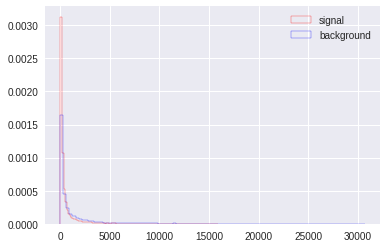

lep1vsPt_pt


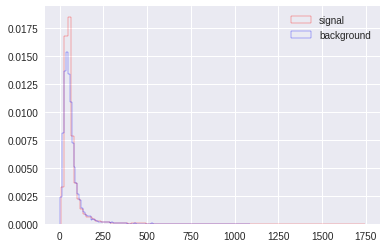

lep1vsPt_px


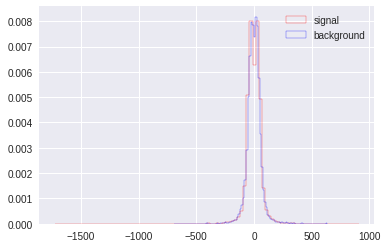

lep1vsPt_py


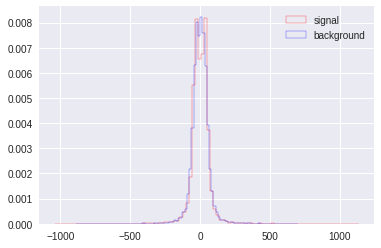

lep1vsPt_pz


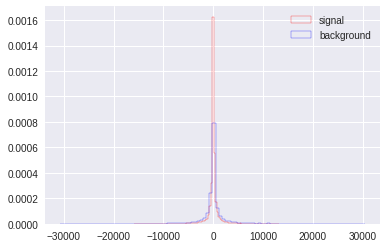

lep1vsPt_theta


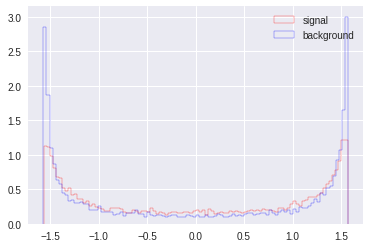

lep1vsPt_eta


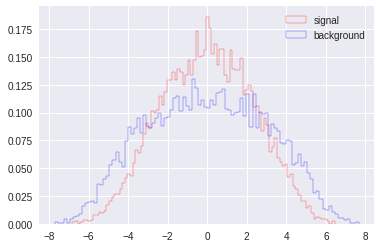

lep1vsPt_phi


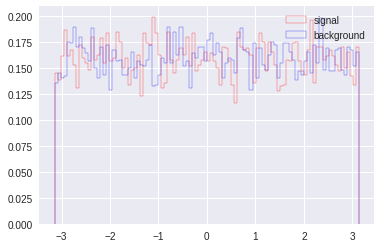

In [6]:
for var in kin_vars[:8]:
    print(var)
    plt.figure()
    plt.hist(pp_h_4l[var], bins=100, histtype="step", density=True, color="red", label="signal", stacked=True)
    plt.hist(pp_zgzg_4l[var], bins=100, histtype="step", density=True, color="blue", label="background", stacked=True)
    plt.legend(loc='upper right')
    plt.show()


# Fisher Discriminant
(aka Linear Discriminant Analysis, or LDA)

## Preparing samples

Let's put `signal` label to our samples in order to dinstigush them after combining. Now the first column stores the "truth" label of whether an event was signal or background:

In [7]:
pp_h_4l.insert(loc=0, column='signal', value=1.0)
pp_zgzg_4l.insert(loc=0, column='signal', value=0.0)

kin_vars.insert(0, 'signal') # insert 'signal' to our variables list too

# pp_h_4l['signal'] = 1.0
# pp_zgzg_4l['signal'] = 0.0
pp_h_4l.head()

,signal,lep1vsPt_e,lep1vsPt_pt,lep1vsPt_px,lep1vsPt_py,lep1vsPt_pz,lep1vsPt_theta,lep1vsPt_eta,lep1vsPt_phi,lep2vsPt_e,...,lep3vsPt_eta,lep3vsPt_phi,lep4vsPt_e,lep4vsPt_pt,lep4vsPt_px,lep4vsPt_py,lep4vsPt_pz,lep4vsPt_theta,lep4vsPt_eta,lep4vsPt_phi
0,1.0,40.817599,40.816309,-7.430504,-40.134258,0.324458,0.007949,0.007949,-1.753865,88.221803,...,0.904967,1.695575,11.299976,8.581384,-8.410522,1.703895,-7.351065,-0.708330,-0.776280,2.941707
1,1.0,1110.684463,50.237450,47.376976,-16.709984,1109.547729,1.525550,3.788606,-0.339080,916.350779,...,2.951899,2.957064,151.782980,9.268806,4.757098,7.954923,151.499710,1.509692,3.488011,1.031844
2,1.0,183.672265,73.585952,-32.633724,-65.954018,-168.287247,-1.158584,-1.565062,-2.030271,89.974504,...,-1.850662,2.450955,15.433533,4.738079,3.668590,2.998472,-14.687865,-1.258751,-1.849592,0.685223
3,1.0,42.281700,39.489943,-39.316151,-3.700795,-15.108787,-0.365416,-0.373830,-3.047740,46.944943,...,0.428923,0.706051,16.472994,15.589799,-7.054197,13.902523,5.321438,0.328940,0.335038,2.040350
4,1.0,704.754401,654.673065,190.100601,-626.465149,260.925171,0.379263,0.388696,-1.276178,325.376137,...,0.299380,-1.490367,33.783233,33.571311,7.927998,-32.621769,3.776598,0.112024,0.112259,-1.332390


Combine the samples:

In [8]:
frames = [pp_h_4l, pp_zgzg_4l]
ds = pd.concat(frames, ignore_index=True)
ds.head()

,signal,lep1vsPt_e,lep1vsPt_pt,lep1vsPt_px,lep1vsPt_py,lep1vsPt_pz,lep1vsPt_theta,lep1vsPt_eta,lep1vsPt_phi,lep2vsPt_e,...,lep3vsPt_eta,lep3vsPt_phi,lep4vsPt_e,lep4vsPt_pt,lep4vsPt_px,lep4vsPt_py,lep4vsPt_pz,lep4vsPt_theta,lep4vsPt_eta,lep4vsPt_phi
0,1.0,40.817599,40.816309,-7.430504,-40.134258,0.324458,0.007949,0.007949,-1.753865,88.221803,...,0.904967,1.695575,11.299976,8.581384,-8.410522,1.703895,-7.351065,-0.708330,-0.776280,2.941707
1,1.0,1110.684463,50.237450,47.376976,-16.709984,1109.547729,1.525550,3.788606,-0.339080,916.350779,...,2.951899,2.957064,151.782980,9.268806,4.757098,7.954923,151.499710,1.509692,3.488011,1.031844
2,1.0,183.672265,73.585952,-32.633724,-65.954018,-168.287247,-1.158584,-1.565062,-2.030271,89.974504,...,-1.850662,2.450955,15.433533,4.738079,3.668590,2.998472,-14.687865,-1.258751,-1.849592,0.685223
3,1.0,42.281700,39.489943,-39.316151,-3.700795,-15.108787,-0.365416,-0.373830,-3.047740,46.944943,...,0.428923,0.706051,16.472994,15.589799,-7.054197,13.902523,5.321438,0.328940,0.335038,2.040350
4,1.0,704.754401,654.673065,190.100601,-626.465149,260.925171,0.379263,0.388696,-1.276178,325.376137,...,0.299380,-1.490367,33.783233,33.571311,7.927998,-32.621769,3.776598,0.112024,0.112259,-1.332390


Randomly permute rows in the combined sample:

In [9]:
np.random.seed(14)
ds = ds.iloc[np.random.permutation(len(ds))].reset_index(drop=True).copy()
ds.head()

,signal,lep1vsPt_e,lep1vsPt_pt,lep1vsPt_px,lep1vsPt_py,lep1vsPt_pz,lep1vsPt_theta,lep1vsPt_eta,lep1vsPt_phi,lep2vsPt_e,...,lep3vsPt_eta,lep3vsPt_phi,lep4vsPt_e,lep4vsPt_pt,lep4vsPt_px,lep4vsPt_py,lep4vsPt_pz,lep4vsPt_theta,lep4vsPt_eta,lep4vsPt_phi
0,1.0,833.432619,471.187987,-205.087784,424.213531,-687.453125,-0.969929,-1.171791,2.021120,784.197783,...,-1.061637,2.019502,75.732588,42.164620,1.617603,42.133579,-62.909218,-0.980320,-1.190312,1.532423
1,1.0,1025.844604,461.163817,461.162842,-0.948175,916.343323,1.104540,1.437817,-0.002056,376.039397,...,1.285837,0.120007,18.836407,3.537480,2.847296,2.099206,18.500954,1.381871,2.356572,0.635299
2,0.0,169.753386,73.144065,52.182674,51.254490,153.186676,1.125324,1.485036,0.776425,198.402303,...,1.232339,-3.057859,18.806057,17.351076,-7.223897,-15.775778,-7.253134,-0.395946,-0.406716,-2.000209
3,1.0,300.398885,178.375267,-9.593818,178.117081,-241.705902,-0.935029,-1.111570,1.624607,57.559493,...,-1.423757,-2.441698,10.308361,9.946511,-1.608201,-9.815639,-2.705195,-0.265551,-0.268728,-1.733194
4,0.0,428.461306,59.574351,9.803563,58.762177,-424.299408,-1.431302,-2.661254,1.405484,221.848918,...,-1.680006,-0.190430,309.263349,37.593548,6.456899,-37.034893,-306.969940,-1.448937,-2.796793,-1.398185


In [0]:
N_Train=9999

Train_Sample=ds[:N_Train]
Test_Sample=ds[N_Train:]

X_Train=Train_Sample[kin_vars[1:]]
y_Train=Train_Sample["signal"]

X_Test=Test_Sample[kin_vars[1:]]
y_Test=Test_Sample["signal"]

Test_sig=Test_Sample[Test_Sample.signal==1]
Test_bkg=Test_Sample[Test_Sample.signal==0]

## Using classifier

[Scikit-learn](http://scikit-learn.org/) is a rich python library for data science, including machine learning. The [LDA Documentation](https://scikit-learn.org/stable/modules/lda_qda.html#dimensionality-reduction-using-linear-discriminant-analysis) does as great job explaining this classifier. Here's how we instanciate the classifier:

In [0]:
import sklearn.discriminant_analysis as DA
Fisher=DA.LinearDiscriminantAnalysis()

We can train the classifier as follow:

In [12]:
Fisher.fit(X_Train,y_Train)

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
              solver='svd', store_covariance=False, tol=0.0001)

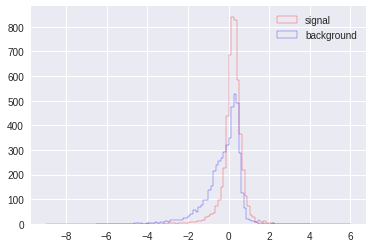

In [13]:
plt.figure()
plt.hist(Fisher.decision_function(Test_sig[kin_vars[1:]]),bins=100,histtype="step", color="red", label="signal",stacked=True)
plt.hist(Fisher.decision_function(Test_bkg[kin_vars[1:]]),bins=100,histtype="step", color="blue", label="background",stacked=True)
plt.legend(loc='upper right')
plt.show()


And we can make a ROC curve and evaluate the AUC:

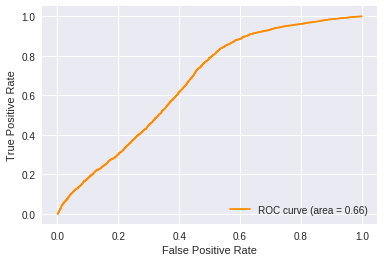

In [14]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, _ = roc_curve(y_Test, Fisher.decision_function(X_Test))

roc_auc = auc(fpr, tpr)

plt.plot(fpr,tpr,color='darkorange',label='ROC curve (area = %0.2f)' % roc_auc)
plt.legend(loc="lower right")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.show()

## Let's introduce features

In [0]:
ds['m2'] = (ds['lep1vsPt_e'] +ds['lep2vsPt_e'] +ds['lep3vsPt_e'] +ds['lep4vsPt_e'])**2 \
         - (ds['lep1vsPt_px']+ds['lep2vsPt_px']+ds['lep3vsPt_px']+ds['lep4vsPt_px'])**2 \
         - (ds['lep1vsPt_py']+ds['lep2vsPt_py']+ds['lep3vsPt_py']+ds['lep4vsPt_py'])**2 \
         - (ds['lep1vsPt_pz']+ds['lep2vsPt_pz']+ds['lep3vsPt_pz']+ds['lep4vsPt_pz'])**2

ds['m'] = ds['m2']**0.5

In [16]:
ds['m'].head()

0    124.982681
1    124.510154
2    215.754150
3    149.334718
4    205.878610
Name: m, dtype: float64

## Applying weights

In [17]:
# number of generated events
nGenS = 10000
nGenB = 9998

# integrated luminosity
intLumi = 25000

kFactorS = 3.50
kFactorB = 1.80

# MG5 LO XS x BR in (pb)
sigmaS = 0.026
sigmaB = 1.04

weightS = kFactorS*sigmaS*intLumi/nGenS
weightB = kFactorB*sigmaB*intLumi/nGenB

weight_pp_h_4l = np.full(10000, weightS)
weight_pp_zgzg_4l = np.full(9998, weightB)

print("(constant) weight for signal sample:", weightS)
print("(constant) weight for background sample:", weightB)

(constant) weight for signal sample: 0.2275
(constant) weight for background sample: 4.680936187237448


In [18]:
dsw = ds.copy()
mask = ds.signal == 0.0
dsw['weight'] = 0.2275
dsw.loc[mask, 'weight'] = 4.6809
dsw.head()

,signal,lep1vsPt_e,lep1vsPt_pt,lep1vsPt_px,lep1vsPt_py,lep1vsPt_pz,lep1vsPt_theta,lep1vsPt_eta,lep1vsPt_phi,lep2vsPt_e,...,lep4vsPt_pt,lep4vsPt_px,lep4vsPt_py,lep4vsPt_pz,lep4vsPt_theta,lep4vsPt_eta,lep4vsPt_phi,m2,m,weight
0,1.0,833.432619,471.187987,-205.087784,424.213531,-687.453125,-0.969929,-1.171791,2.021120,784.197783,...,42.164620,1.617603,42.133579,-62.909218,-0.980320,-1.190312,1.532423,15620.670527,124.982681,0.2275
1,1.0,1025.844604,461.163817,461.162842,-0.948175,916.343323,1.104540,1.437817,-0.002056,376.039397,...,3.537480,2.847296,2.099206,18.500954,1.381871,2.356572,0.635299,15502.778496,124.510154,0.2275
2,0.0,169.753386,73.144065,52.182674,51.254490,153.186676,1.125324,1.485036,0.776425,198.402303,...,17.351076,-7.223897,-15.775778,-7.253134,-0.395946,-0.406716,-2.000209,46549.853102,215.754150,4.6809
3,1.0,300.398885,178.375267,-9.593818,178.117081,-241.705902,-0.935029,-1.111570,1.624607,57.559493,...,9.946511,-1.608201,-9.815639,-2.705195,-0.265551,-0.268728,-1.733194,22300.857926,149.334718,0.2275
4,0.0,428.461306,59.574351,9.803563,58.762177,-424.299408,-1.431302,-2.661254,1.405484,221.848918,...,37.593548,6.456899,-37.034893,-306.969940,-1.448937,-2.796793,-1.398185,42386.002013,205.878610,4.6809


In [0]:
# dsw.head()
# df.loc[df['column_name'] == some_value]
dsw.loc[dsw['signal'] == 0.0]['m']

**Invariant mass of 4 leptons: unweighted events**

m_4l


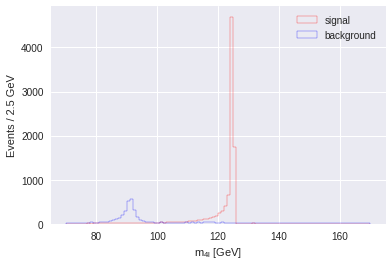

In [21]:
print("m_4l")
plt.figure()
plt.hist(dsw.loc[dsw['signal'] == 1.0]['m'], bins=100, range=(70., 170.), histtype="step", color="red", label="signal", stacked=True)
plt.hist(dsw.loc[dsw['signal'] == 0.0]['m'], bins=100, range=(70., 170.), histtype="step", color="blue", label="background", stacked=True)
plt.legend(loc='upper right')
plt.xlabel('$\mathregular{m_{4l}}$ [GeV]')
plt.ylabel('Events / 2.5 GeV')
plt.show()

**Invariant mass of 4 leptons: weighted events**

m_4l


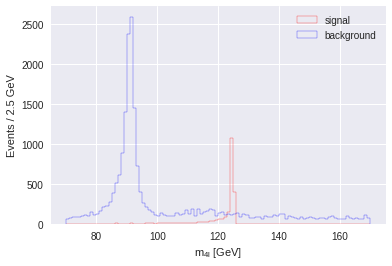

In [22]:
print("m_4l")
plt.figure()
plt.hist(dsw.loc[dsw['signal'] == 1.0]['m'], bins=100, range=(70., 170.), weights=weight_pp_h_4l, histtype="step", color="red", label="signal", stacked=True)
plt.hist(dsw.loc[dsw['signal'] == 0.0]['m'], bins=100, range=(70., 170.), weights=weight_pp_zgzg_4l, histtype="step", color="blue", label="background", stacked=True)
plt.legend(loc='upper right')
plt.xlabel('$\mathregular{m_{4l}}$ [GeV]')
plt.ylabel('Events / 2.5 GeV')
plt.show()

## Preparing samples (again)

In [0]:
frames = [pp_h_4l, pp_zgzg_4l]
ds_with_features = pd.concat(frames, ignore_index=True)
np.random.seed(14)
ds_with_features = ds_with_features.iloc[np.random.permutation(len(ds))].reset_index(drop=True).copy()
ds_with_features.head()

In [0]:
all_vars = kin_vars.copy()

all_vars.append('m')

In [0]:
N_Train=9999

Train_Sample=ds_with_features[:N_Train]
Test_Sample=ds_with_features[N_Train:]

X_Train=Train_Sample[kin_vars[1:]]
y_Train=Train_Sample["signal"]

X_Test=Test_Sample[kin_vars[1:]]
y_Test=Test_Sample["signal"]

Test_sig=Test_Sample[Test_Sample.signal==1]
Test_bkg=Test_Sample[Test_Sample.signal==0]



X_Train_Raw=Train_Sample[kin_vars]
X_Test_Raw=Test_Sample[kin_vars]

X_Train_Features=Train_Sample[features]
X_Test_Features=Test_Sample[features]

X_Train_all_vars=Train_Sample[all_vars]
X_Test_all_vars=Test_Sample[all_vars]

In [0]:
def TrainFisher(X_Train,X_Test,y_Train):
    Fisher=DA.LinearDiscriminantAnalysis()
    Fisher.fit(X_Train,y_Train)

    fpr, tpr, _ = roc_curve(y_Test, Fisher.decision_function(X_Test))
    roc_auc = auc(fpr, tpr)

    plt.plot(fpr,tpr,color='darkorange',label='ROC curve (area = %0.2f)' % roc_auc)
    plt.legend(loc="lower right")
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.show()
    
    return Fisher

kin_vars_Fisher=TrainFisher(X_Train_Raw,X_Test_Raw,y_Train)
features_Fisher=TrainFisher(X_Train_Features,X_Test_Features,y_Train)
all_vars_Fisher=TrainFisher(X_Train_all_vars,X_Test_all_vars,y_Train)

## Significance

The following function calculates the significance of the observation of the signal given the number of expected Signal and Background events, using the simple formula $\sigma_S= \frac{N_S}{\sqrt{N_S+N_B}}$. Read through the code carefully.

In [0]:
def PlotSignificance(N_S,N_B, N_S_min=1):
    plt.figure()
    eff_sig,bins_sig,p_sig=plt.hist(Fisher.decision_function(Test_sig[kin_vars[1:]]),bins=100,histtype="step",color="red",label="signal",cumulative=-1,stacked=True,normed=True)
    eff_bkg,bins_bkg,p_bkg=plt.hist(Fisher.decision_function(Test_bkg[kin_vars[1:]]),bins=100,histtype="step",color="blue",label="background",cumulative=-1,stacked=True,normed=True)
    plt.legend(loc='upper right')
    plt.show()
    
    good_bins = np.where(eff_sig*N_S>=N_S_min)

    print(len(good_bins[0]))
    if len(good_bins[0])<1:
        print("Insufficient Signal.")
        return 0,0,0
    
    significance=(N_S*eff_sig)/np.sqrt((N_B*eff_bkg)+(N_S*eff_sig))

    plt.figure()
    plt.plot(bins_sig[:-1],significance)
    
    max_sign=np.max(significance[good_bins])
    max_signI=np.argmax(significance[good_bins])
    
    plt.show()
    print("Max significance at ", bins_sig[max_signI], " of", max_sign)
    return bins_sig[max_signI],max_sign, max_signI
    
PlotSignificance(1000000,1e11)

# LogisticRegression

In [0]:
ds.head()

Apply weights to dataframe:

In [0]:
dsw = ds.copy()
mask = ds.signal == 0.0
dsw['weight'] = 0.2275
dsw.loc[mask, 'weight'] = 4.6809
dsw.head()

In [0]:
dsw['m2'] = (dsw['lep1vsPt_e'] +dsw['lep2vsPt_e'] +dsw['lep3vsPt_e'] +dsw['lep4vsPt_e'])**2 \
          - (dsw['lep1vsPt_px']+dsw['lep2vsPt_px']+dsw['lep3vsPt_px']+dsw['lep4vsPt_px'])**2 \
          - (dsw['lep1vsPt_py']+dsw['lep2vsPt_py']+dsw['lep3vsPt_py']+dsw['lep4vsPt_py'])**2 \
          - (dsw['lep1vsPt_pz']+dsw['lep2vsPt_pz']+dsw['lep3vsPt_pz']+dsw['lep4vsPt_pz'])**2

dsw['m'] = dsw['m2']**0.5
dsw.head()

In [0]:
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [0]:
train, test = train_test_split(dsw, test_size=0.25)

In [0]:
from sklearn.preprocessing import RobustScaler

In [0]:
def features(x):
    return np.array([
x['lep1vsPt_e'], x['lep1vsPt_pt'], x['lep1vsPt_px'], x['lep1vsPt_py'], x['lep1vsPt_pz'], x['lep1vsPt_theta'], x['lep1vsPt_eta'], x['lep1vsPt_phi'], \
x['lep2vsPt_e'], x['lep2vsPt_pt'], x['lep2vsPt_px'], x['lep2vsPt_py'], x['lep2vsPt_pz'], x['lep2vsPt_theta'], x['lep2vsPt_eta'], x['lep2vsPt_phi'], \
x['lep3vsPt_e'], x['lep3vsPt_pt'], x['lep3vsPt_px'], x['lep3vsPt_py'], x['lep3vsPt_pz'], x['lep3vsPt_theta'], x['lep3vsPt_eta'], x['lep3vsPt_phi'], \
x['lep4vsPt_e'], x['lep4vsPt_pt'], x['lep4vsPt_px'], x['lep4vsPt_py'], x['lep4vsPt_pz'], x['lep4vsPt_theta'], x['lep4vsPt_eta'], x['lep4vsPt_phi'], \
x['m'], \
    ]).T

scaler = RobustScaler()
model = LogisticRegression()
scaler.fit(features(train))
model.fit(scaler.transform(features(train)), train.signal, train.weight)

preds_train = model.predict_proba(scaler.transform(features(train)))[:,1]
preds_test  = model.predict_proba(scaler.transform(features(test )))[:,1]

print(roc_auc_score(train.signal, preds_train))
print(roc_auc_score(test .signal, preds_test ))

In [0]:
fpr_mod, tpr_mod, _ = roc_curve(test.signal, preds_test)

roc_auc = auc(fpr_mod, tpr_mod)

plt.plot(fpr,tpr,color='darkorange',label='ROC curve (area = %0.2f)' % roc_auc)
plt.legend(loc="lower right")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.show()

In [0]:
scaler.transform(features(train))

In [0]:
train[train.signal == 1.0]

In [0]:
def PlotSignificance(N_S,N_B, N_S_min=1):
    plt.figure()
    eff_sig,bins_sig,p_sig=plt.hist(model.decision_function(scaler.transform(features(train[train.signal == 1.0]))),bins=100,histtype="step",color="red",label="signal",cumulative=-1,stacked=True,normed=True)
    eff_bkg,bins_bkg,p_bkg=plt.hist(model.decision_function(scaler.transform(features(train[train.signal == 0.0]))),bins=100,histtype="step",color="blue",label="background",cumulative=-1,stacked=True,normed=True)
    plt.legend(loc='upper right')
    plt.show()
    
    good_bins = np.where(eff_sig*N_S>=N_S_min)

    print(len(good_bins[0]))
    if len(good_bins[0])<1:
        print("Insufficient Signal.")
        return 0,0,0
    
    significance=(N_S*eff_sig)/np.sqrt((N_B*eff_bkg)+(N_S*eff_sig))

    plt.figure()
    plt.plot(bins_sig[:-1],significance)
    
    max_sign=np.max(significance[good_bins])
    max_signI=np.argmax(significance[good_bins])
    
    plt.show()
    print("Max significance at ", bins_sig[max_signI], " of", max_sign)
    return bins_sig[max_signI],max_sign, max_signI
    
PlotSignificance(1000000,1e11)